In [1]:
import numpy as np
import matplotlib.pyplot as plt

Load in each of the biases and plot their average.

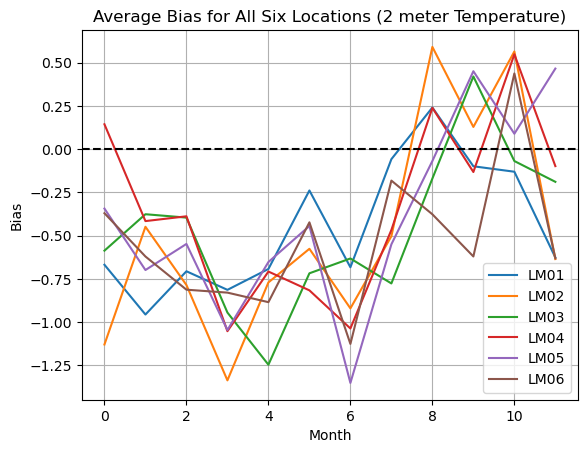

In [2]:
%store -r bias_DUB
%store -r bias_CORK
%store -r bias_BEL
%store -r bias_VAL
%store -r bias_MAL
%store -r bias_MUL

bias_avg = (bias_DUB + bias_CORK + bias_BEL + bias_VAL + bias_MAL + bias_MUL) / 6

for LM in range(6):
    plt.plot(bias_avg[LM,:])
      
leadtime = ['LM01', 'LM02', 'LM03', 'LM04', 'LM05', 'LM06']

plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(leadtime)
plt.title("Average Bias for All Six Locations (2 meter Temperature)")
plt.xlabel("Month")
plt.ylabel("Bias")
plt.savefig("../Thesis/Bias_avg.jpg")
plt.show()

The overall average bias for each lead time is given below.

In [3]:
bias_mean_avg = np.zeros(6)

for LM in range(6):
    bias_mean_avg[LM] = np.mean(bias_avg[LM,:])
    
bias_mean_avg

array([-0.45262004, -0.48512134, -0.47360833, -0.34862865, -0.39148193,
       -0.53656515])

Repeat the same process as above, except for the RMSE now.

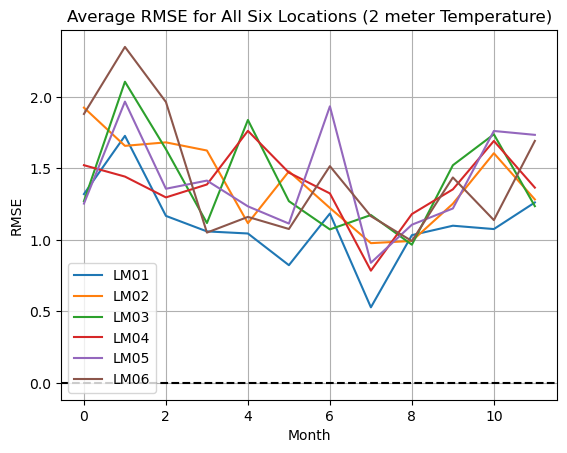

In [4]:
%store -r RMSE_DUB
%store -r RMSE_CORK
%store -r RMSE_BEL
%store -r RMSE_VAL
%store -r RMSE_MAL
%store -r RMSE_MUL

RMSE_avg = (RMSE_DUB + RMSE_CORK + RMSE_BEL + RMSE_VAL + RMSE_MAL + RMSE_MUL) / 6

for LM in range(6):
    plt.plot(RMSE_avg[LM,:])
               
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.legend(leadtime)
plt.title("Average RMSE for All Six Locations (2 meter Temperature)")
plt.xlabel("Month")
plt.ylabel("RMSE")
plt.savefig("../Thesis/RMSE_avg.jpg")
plt.show()

The overall average RMSE for each lead time is given below.

In [5]:
RMSE_mean_avg = np.zeros(6)

for LM in range(6):
    RMSE_mean_avg[LM] = np.mean(RMSE_avg[LM,:])
    
RMSE_mean_avg

array([1.11046253, 1.40163684, 1.41227414, 1.38192792, 1.41141666,
       1.45187589])

Again, this time for the ACC.

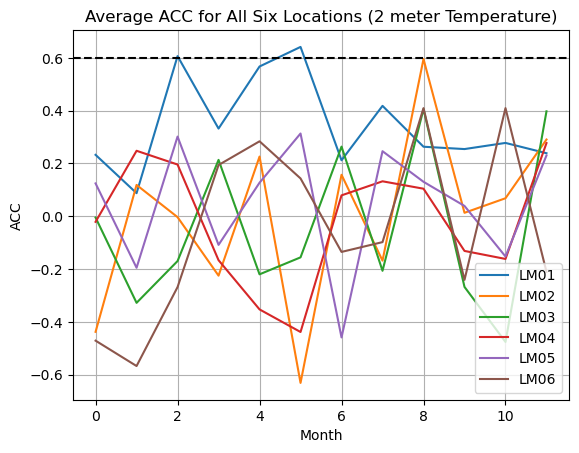

In [6]:
%store -r ACC_DUB
%store -r ACC_CORK
%store -r ACC_BEL
%store -r ACC_VAL
%store -r ACC_MAL
%store -r ACC_MUL

ACC_avg = (ACC_DUB + ACC_CORK + ACC_BEL + ACC_VAL + ACC_MAL + ACC_MUL) / 6

for LM in range(6):
    plt.plot(ACC_avg[LM,:])
               
plt.grid()
plt.axhline(y=0.6, color='black', linestyle='--')
plt.legend(leadtime)
plt.title("Average ACC for All Six Locations (2 meter Temperature)")
plt.xlabel("Month")
plt.ylabel("ACC")
plt.savefig("../Thesis/ACC_avg.jpg")
plt.show()

The overall average ACC for each lead time is given below.

In [7]:
ACC_mean_avg = np.zeros(6)

for LM in range(6):
    ACC_mean_avg[LM] = np.mean(ACC_avg[LM,:])
    
ACC_mean_avg

array([ 0.34445709,  0.0005284 , -0.04543865, -0.01936415,  0.05001415,
       -0.04568925])

Load in the false alarm rate and hit rate from each of the six stations and calculate the average.

In [8]:
%store -r DUB_FAR
%store -r DUB_HR

%store -r CORK_FAR
%store -r CORK_HR

%store -r BEL_FAR
%store -r BEL_HR

%store -r VAL_FAR
%store -r VAL_HR

%store -r MAL_FAR
%store -r MAL_HR

%store -r MUL_FAR
%store -r MUL_HR

FAR_avg = (DUB_FAR + CORK_FAR + BEL_FAR + VAL_FAR + MAL_FAR + MUL_FAR) / 6 
HR_avg = (DUB_HR + CORK_HR + BEL_HR + VAL_HR + MAL_HR + MUL_HR) / 6 

Plot the average hit rate vs the average false alarm rate for each of the six lead times.

Also calculate the ROC score for each of the six lead times.

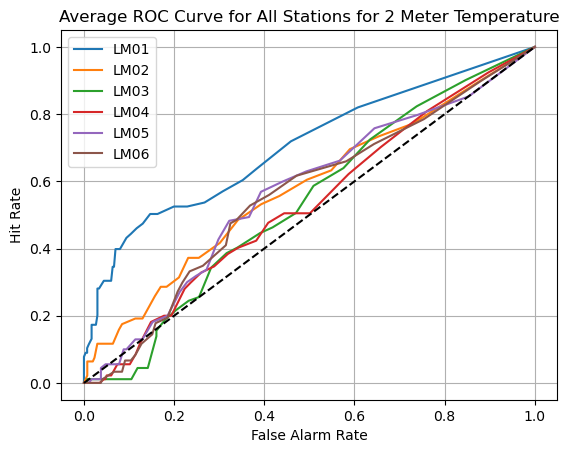

In [9]:
from scipy import integrate

ROC_avg = np.zeros(6)
for LM in range(6):
    plt.plot(FAR_avg[LM], HR_avg[LM])
    ROC_avg[LM] = integrate.trapz(HR_avg[LM], FAR_avg[LM])
    
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), color='black', linestyle='--')
plt.legend(['LM01','LM02','LM03','LM04','LM05','LM06'])
plt.title("Average ROC Curve for All Stations for 2 Meter Temperature")
plt.xlabel("False Alarm Rate")
plt.ylabel("Hit Rate")
plt.grid()
plt.savefig("ROC_avg.jpg")
plt.show()

The average ROC score for each lead time is given by:

In [10]:
ROC_avg

array([0.70409634, 0.57817169, 0.53547842, 0.52954435, 0.56591122,
       0.55660356])

Next, load in the Brier scores for upper, middle and lower terciles for each of the six loactions.

In [13]:
%store -r Brier_Upper_DUB
%store -r Brier_Upper_CORK
%store -r Brier_Upper_BEL
%store -r Brier_Upper_VAL
%store -r Brier_Upper_MAL
%store -r Brier_Upper_MUL

%store -r Brier_Middle_DUB
%store -r Brier_Middle_CORK
%store -r Brier_Middle_BEL
%store -r Brier_Middle_VAL
%store -r Brier_Middle_MAL
%store -r Brier_Middle_MUL

%store -r Brier_Lower_DUB
%store -r Brier_Lower_CORK
%store -r Brier_Lower_BEL
%store -r Brier_Lower_VAL
%store -r Brier_Lower_MAL
%store -r Brier_Lower_MUL

Finally, using subplots, plot the average of Dublin Airport and Mullingar's Brier scores on the left subplot, and the average of the other four stations' Brier scores on the right subplot.

Set the y-axis to be the same on both subplots for clearer context that the left subplot illustrates better results.

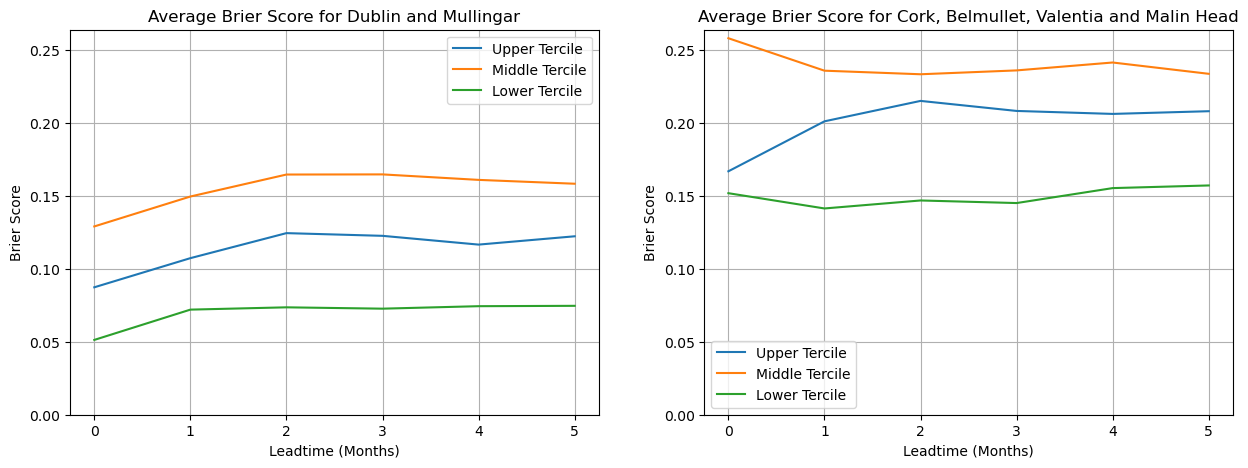

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot((Brier_Upper_DUB + Brier_Upper_MUL) / 2, label='Upper Tercile')
ax[0].plot((Brier_Middle_DUB + Brier_Middle_MUL) / 2, label='Middle Tercile')
ax[0].plot((Brier_Lower_DUB + Brier_Lower_MUL) / 2, label='Lower Tercile')
ax[0].grid()
ax[0].legend()
ax[0].set_xlabel('Leadtime (Months)')
ax[0].set_ylabel('Brier Score')
ax[0].set_title('Average Brier Score for Dublin and Mullingar')

ax[1].plot((Brier_Upper_CORK + Brier_Upper_BEL + Brier_Upper_VAL + Brier_Upper_MAL) / 4, label='Upper Tercile')
ax[1].plot((Brier_Middle_CORK + Brier_Middle_BEL + Brier_Middle_VAL + Brier_Middle_MAL) / 4, label='Middle Tercile')
ax[1].plot((Brier_Lower_CORK + Brier_Lower_BEL + Brier_Lower_VAL + Brier_Lower_MAL) / 4, label='Lower Tercile')
ax[1].grid()
ax[1].legend()
ax[1].set_xlabel('Leadtime (Months)')
ax[1].set_ylabel('Brier Score')
ax[1].set_title('Average Brier Score for Cork, Belmullet, Valentia and Malin Head')

ymax = max(ax[0].get_ylim()[1], ax[1].get_ylim()[1])
ax[0].set_ylim(0, ymax)
ax[1].set_ylim(0, ymax)

fig.savefig('BrierScore.jpg')

plt.show()